In [1]:
from __future__ import print_function
from f4klib2 import *
import seaborn as sns
movs = loadMovids()
movs_length = loadLengths()

Using video_id: 13b00abf7ea757a4a4de1618c8411924#201103131800
Using movie, csv, sql paths: 
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/1/13/summary_13b00abf7ea757a4a4de1618c8411924#201103131800.avi
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/1/13/frame_info_13b00abf7ea757a4a4de1618c8411924#201103131800.txt
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/sqldump/1/13/13b00abf7ea757a4a4de1618c8411924#201103131800.txt
Video frame size: 640x480, camera_id: 37
Total frames in video: 961
961 out of 961, about 100% detection have a bounding box in sql.


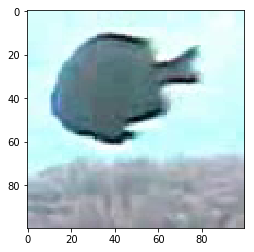

In [2]:
movid = movs[30599]
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid, print_info=True, print_time=False)

picker = 50
image1=(clip[picker])
thiscontour = getContour(contour[picker])
mask = np.full(image1.shape, 0, dtype=np.uint8)
cv2.fillPoly(mask, np.int32([thiscontour]), (255,)*3)
#image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2YUV)
#image2 = cv2.bitwise_and(image1,mask)
#image3 = copy.deepcopy(image2).astype(float)
#image3[:,:,0] = normalizeRGB(image2)[:,:,0]*256
plt.imshow(image1)
plt.show()

def spartialContrastiveNormalization1D(imagein, kernel):
    for i in range(3):
        mean = ndi.convolve(imagein[:,:,i], neighbourhood, mode='constant', cval=0.0,  output=np.float64)
        V = imagein[:,:,i] - mean
        S = np.sqrt(ndi.convolve(np.power(V, 2.0),kernel, mode='constant', cval=0.0,  output=np.float64))
        imagein[:,:,i] = V/S
    return imagein

# CNN

In [100]:
import lutorpy as lua
require('nn')
require('image')

modelname = 'N_SGD'
# meann = [0.5, 0.5, 0.5]
# stdd = [0.25, 0.25, 0.25]

# if modelname == 'N_SGD':
#     meann = [0.39652687546177, 0.45261265063944, 0.42062426025794]
#     stdd =  [0.28132888018719, 0.30690810636064, 0.30367700787976]
# if modelname == 'W_C_SGD':
#     meann = [0.9249023692381,  0.92963844758093, 0.92607431571841]
#     stdd =  [0.21736589663274, 0.20606532102447, 0.21408039791867]
# if modelname == 'B_C_SGD':
#     meann = [0.048790299759605,0.052937559625764,0.049839084833519]
#     stdd =  [0.15689543246897, 0.16453823057925, 0.15784736844257]
    
meann = [[0.5, 0.5, 0.5],
         [0.39652687546177, 0.45261265063944, 0.42062426025794], #'N_SGD'
         [0.9249023692381,  0.92963844758093, 0.92607431571841], #'W_C_SGD'
         [0.048790299759605,0.052937559625764,0.049839084833519]]#'B_C_SGD'

stdd = [[0.25, 0.25, 0.25],
        [0.28132888018719, 0.30690810636064, 0.30367700787976],#'N_SGD'
        [0.21736589663274, 0.20606532102447, 0.21408039791867],#'W_C_SGD'
        [0.15689543246897, 0.16453823057925, 0.15784736844257]]#'B_C_SGD'

neighbourhood = image.gaussian1D(13)
normalization = nn.SpatialContrastiveNormalization(1, neighbourhood, 1)._double()

model = torch.load('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/lua/models/float/N_SGD.model.net')
fmodel = model._double()
print(fmodel)

nn.Sequential {
  [input -> (1) -> (2) -> (3) -> (4) -> (5) -> (6) -> (7) -> (8) -> (9) -> (10) -> (11) -> (12) -> output]
  (1): nn.SpatialConvolutionMM(3 -> 64, 5x5)
  (2): nn.ReLU
  (3): nn.SpatialMaxPooling(2x2, 2,2)
  (4): nn.SpatialConvolutionMM(64 -> 64, 5x5)
  (5): nn.ReLU
  (6): nn.SpatialMaxPooling(2x2, 2,2)
  (7): nn.View(30976)
  (8): nn.Dropout(0.500000)
  (9): nn.Linear(30976 -> 128)
  (10): nn.ReLU
  (11): nn.Linear(128 -> 10)
  (12): nn.LogSoftMax
}


In [16]:
#buggy as hell
# dofile('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k/lua/models/normalize.lua')
# xn = np.transpose(image1,(2,0,1)).astype(np.double)/255.0
# xt = torch.fromNumpyArray(xn)
# xt = preprocess_data_yuv_normalize(xt, modelname)
# print(xt)

In [66]:
#Numpy Array to Torch Tensor
xt = torch.fromNumpyArray(np.transpose(image1,(2,0,1)).astype(np.double)/255.0)._double()
xt = image.rgb2yuv(xt)
for i in range(3):
    xt[i]._add(-meann[i])
    xt[i]._div(stdd[i])
    xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
yt = fmodel._forward(xt)
yn = yt.asNumpyArray()

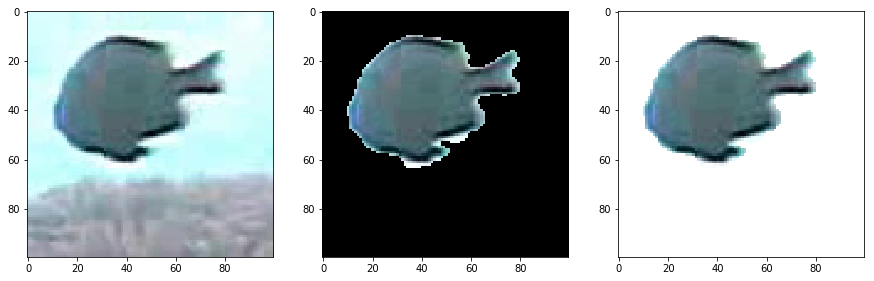

In [96]:
f = 50

image_contour = getContour(contour[f])
mask = np.full(image_N.shape, 0, dtype=np.uint8)
cv2.fillPoly(mask, np.int32([image_contour]), (255,)*3)

image_N = clip[f]
image_BC = cv2.bitwise_and(mask,image_N)
image_WC = cv2.bitwise_or(cv2.bitwise_not(mask),image_N)

plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(image_N)
plt.subplot(1,3,2)
plt.imshow(image_BC)
plt.subplot(1,3,3)
plt.imshow(image_WC)
plt.show()

In [101]:
time = datetime.now()
#print("Took total of {0}".format(datetime.now() - time))
for f in range(frames):
    
    image_contour = getContour(contour[f])
    mask = np.full(image_N.shape, 0, dtype=np.uint8)
    cv2.fillPoly(mask, np.int32([image_contour]), (255,)*3)

    image_N = clip[f]
    image_BC = cv2.bitwise_and(mask,image_N)
    image_WC = cv2.bitwise_or(cv2.bitwise_not(mask),image_N)
    
#     xn = np.transpose(image_N,(2,0,1)).astype(np.double)/255.0
#     xt = torch.fromNumpyArray(xn)
#     xt = preprocess_data_yuv_normalize(xt, 'N_SGD')
#     yt = fmodel._forward(xt)
#     yn = yt.asNumpyArray()
    
#     xn = np.transpose(image_BC,(2,0,1)).astype(np.double)/255.0
#     xt = torch.fromNumpyArray(xn)
#     xt = preprocess_data_yuv_normalize(xt, 'W_C_SGD')
#     yt = fmodel._forward(xt)
#     yn = yt.asNumpyArray()
    
#     xn = np.transpose(image_WC,(2,0,1)).astype(np.double)/255.0
#     xt = torch.fromNumpyArray(xn)
#     xt = preprocess_data_yuv_normalize(xt, 'B_C_SGD')
#     yt = fmodel._forward(xt)
#     yn = yt.asNumpyArray()
    
    #Image_N
    xt = torch.fromNumpyArray(np.transpose(image_N,(2,0,1)).astype(np.double)/255.0)._double()
    xt = image.rgb2yuv(xt)
    for i in range(3):
        xt[i]._add(-meann[1][i])
        xt[i]._div(stdd[1][i])
        xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
    yt = fmodel._forward(xt)
    yn = yt.asNumpyArray()
    
    #Image_W_C
    xt = torch.fromNumpyArray(np.transpose(image_WC,(2,0,1)).astype(np.double)/255.0)._double()
    xt = image.rgb2yuv(xt)
    for i in range(3):
        xt[i]._add(-meann[2][i])
        xt[i]._div(stdd[2][i])
        xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
    yt = fmodel._forward(xt)
    yn = yt.asNumpyArray()
    
    #Image_B_C
    xt = torch.fromNumpyArray(np.transpose(image_BC,(2,0,1)).astype(np.double)/255.0)._double()
    xt = image.rgb2yuv(xt)
    for i in range(3):
        xt[i]._add(-meann[3][i])
        xt[i]._div(stdd[3][i])
        xt[i] = normalization._forward(nn.utils.addSingletonDimension(xt[i],1))
    yt = fmodel._forward(xt)
    yn = yt.asNumpyArray()
    
    print("Frame {1} Took total of {0}".format(datetime.now() - time,f),end='\r')
print("Processing {1} frames Took total of {0}".format(datetime.now() - time,frames))

Processing 961 frames Took total of 0:00:47.232313


In [99]:
#print(xt)
print(xt._type())
print(yn)
print(np.round(np.exp(yn),2))
mattrant = """
So we need to:

1. Convert RGB -> YUV data.lua / preprocess_data_yuv_normalize image.rgb2yuv
2. Normalise against constants from training data | the model chosen
3. Perform per-channel Gaussian filtering to reduce noise
4. Resultant 64x64x3 matrix is the input

Questions:

1. Is the model broken? Redoing the same input operation leads to different results. Causes?
  1, Model is broken
    1. The design?
    2. The library?
  2. Is this a problem with the lua/python interface?
    1. Install lua image
    2. Test image stuff there and manually feed model with normalized input via preproces... a few times
    
"""

torch.DoubleTensor
[-7.48812076e+00 -1.44871926e+01 -1.88712670e+01 -1.02381896e+01
 -8.31644465e+00 -4.98956965e+00 -8.62935650e-03 -7.13746904e+00
 -1.32962549e+01 -8.82683005e+00]
[0.   0.   0.   0.   0.   0.01 0.99 0.   0.   0.  ]


# PCA
---

In [ ]:
ranges = loadRange()
pca = loadPCA(ranges)

In [ ]:
component = pca.components_
eigens = pca.explained_variance_
eigenratio = pca.explained_variance_ratio_

In [ ]:
for i in range(len(eigens)):
    if np.sum(eigenratio[:i+1]) > 0.90:
        print(i)
        break

In [ ]:
print(np.sum(eigenratio>0.01))

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(eigenratio[:88]*100)
ax = plt.gca()
ax.set_yscale("log")
plt.show()

In [ ]:
feature_names = featureNames()
component = component[:50,:]
pt = np.max(np.abs(component),0)
ptall = np.max(np.abs(component))
throw = pt < (ptall*0.01)
throwindex = np.arange(0,2655)[throw]
throwfeature = np.array(feature_names)[throw]

fr = np.vstack((pt/ptall,feature_names))

print(len(throwindex))
print(fr[:,2631:2635])
#print(throwindex+1)
#print(throwfeature)

In [ ]:
head = 0
end = 10
plt.subplots(end-head,1,figsize=(15,(end-head)*5))
for i in np.arange(head,end):
    plt.subplot(end-head,1,i-head+1)
    plt.plot(component[i])
    plt.axvline(x=254.5,color="red")
    plt.axvline(x=509.5,color="red")
    plt.axvline(x=764.5,color="red")
    plt.axvline(x=764.5,color="red")
    plt.axvline(x=819.5,color="red")
    plt.axvline(x=874.5,color="red")
    plt.axvline(x=929.5,color="red")
    plt.axvline(x=943.5,color="red")
    plt.axvline(x=1663.5,color="red")
    plt.axvline(x=1705.5,color="red")
    plt.axvline(x=2385.5,color="red")
    plt.axvline(x=2400.5,color="red")
    plt.axvline(x=2560.5,color="red")
    plt.axvline(x=2625.5,color="red")
plt.show()

# Load Dataset
---

In [19]:
features,targets = loadTrainDataSet(includeNew=True)#,filta="41")
print(features.shape)
print(targets.shape)
print(targets.reshape(-1,1).shape)

counts = np.histogram(targets,np.arange(0,12))[0]
for i in np.arange(1,11):
    print("Class {0}: {1}".format(i,counts[i]))

(70383, 100)
(70383,)
(70383, 1)
Class 1: 1999
Class 2: 8910
Class 3: 3175
Class 4: 2048
Class 5: 2480
Class 6: 18630
Class 7: 18156
Class 8: 12020
Class 9: 269
Class 10: 2696


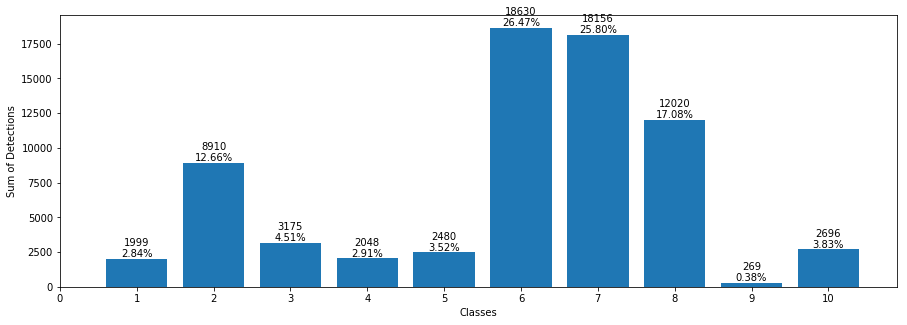

In [20]:
plt.figure(figsize=(15,5))
plt.bar(np.arange(1,11),counts[1:11])
ax = plt.gca()
ax.set_xticks(np.arange(11))
ax.set_xlabel("Classes")
ax.set_ylabel("Sum of Detections")
#ax.set_yticks(np.arange(0,22000,2000))

rects = ax.patches
labels = ["{0:.2f}%".format(counts[i+1]*100.0/sum(counts)) for i in xrange(len(rects))]
labels2 = [str(counts[i+1]) for i in xrange(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
for rect, label in zip(rects, labels2):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 800, label, ha='center', va='bottom')
plt.show()

In [9]:
X = features[:,:10]
y = targets.astype('int') 

# SVM
---

In [ ]:
from sklearn.svm import SVC
features,targets = loadTrainDataSet(includeNew=False)
final_svm = SVC(kernel='rbf',gamma=0.2,C=50,probability=True)
final_svm.fit(features,targets.astype('int'))

In [ ]:
path = '/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/final_svm'
pickle.dump(final_svm, open(path, 'wb'))

[0.41773093 0.45003956 0.47373347 0.509999   0.56942124 0.63545496
 0.69701033 0.72402629 0.63429847 0.47964418 0.38937869]


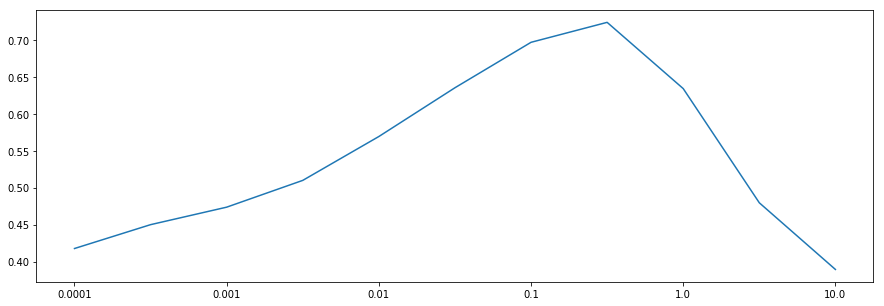

In [10]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/rbfgammascores-4:1.npy")
print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(scores,0))
plt.gca().set_xticklabels(np.insert(np.logspace(-4,1,6),0,0))
plt.show()

(10, 5, 11)
[[0.865 0.865 0.865 0.865 0.865 0.9   0.935 0.93  0.93  0.93  0.93 ]
 [0.865 0.865 0.865 0.865 0.865 0.915 0.94  0.95  0.945 0.945 0.945]
 [0.865 0.865 0.865 0.865 0.865 0.93  0.94  0.945 0.945 0.945 0.945]
 [0.865 0.865 0.865 0.865 0.865 0.895 0.92  0.92  0.92  0.92  0.92 ]
 [0.865 0.865 0.865 0.865 0.865 0.865 0.865 0.865 0.865 0.865 0.865]]


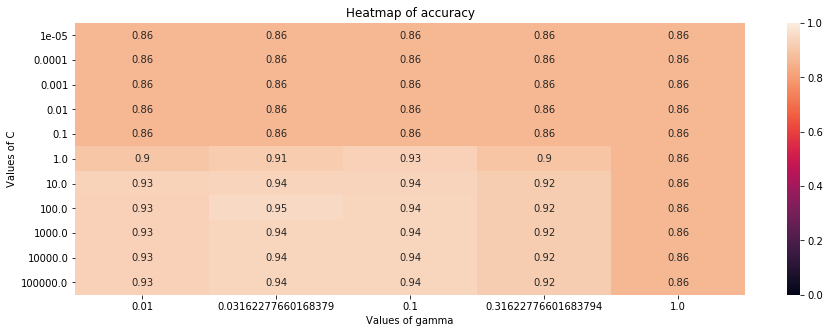

In [11]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores5gx11c.npy")
print(scores.shape)
print(np.average(scores,0))
plt.figure(figsize=(15,5))
sns.heatmap(np.average(scores,0).T,xticklabels=np.logspace(-2,0,5), yticklabels=np.logspace(-5,5,11), vmin=0., vmax=1., annot=True)
plt.xlabel("Values of gamma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 5, 6)
[[0.4168 0.5404 0.6231 0.6703 0.7167 0.7325]
 [0.447  0.5915 0.6643 0.7212 0.7401 0.736 ]
 [0.3627 0.5906 0.7042 0.7474 0.7478 0.7426]
 [0.3543 0.4763 0.7065 0.7291 0.7273 0.7268]
 [0.3543 0.3752 0.6124 0.6421 0.6412 0.6412]]


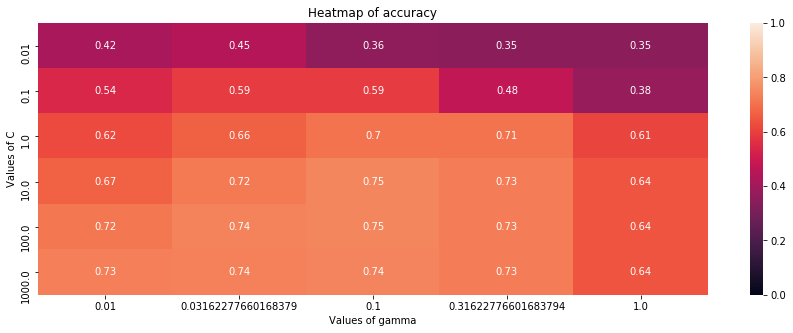

In [12]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores5gx6c1000.npy")
print(scores.shape)
print(np.average(scores,0))
plt.figure(figsize=(15,5))
sns.heatmap(np.average(scores,0).T,xticklabels=np.logspace(-2,0,5), yticklabels=np.logspace(-2,3,6), vmin=0., vmax=1., annot=True)
plt.xlabel("Values of gamma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 5, 6)
[[0.43002573 0.49988641 0.56942124 0.62978793 0.68219152 0.71643784]
 [0.46635653 0.55688224 0.63545496 0.7014398  0.73609312 0.73658161]
 [0.44262974 0.58653633 0.69701033 0.75035831 0.74951151 0.73838932]
 [0.35334107 0.51380938 0.72402629 0.75234497 0.74843669 0.74706879]
 [0.27064862 0.36615696 0.63429847 0.65887191 0.65848109 0.65848109]]


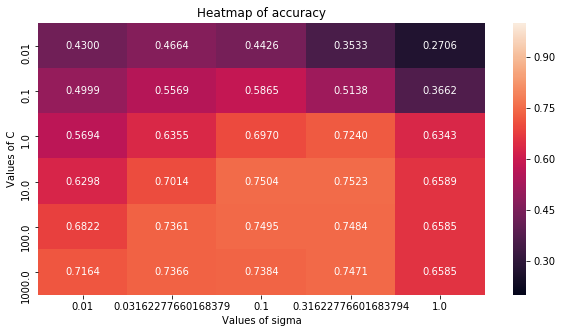

In [13]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores5gx6c.npy")
print(scores.shape)
print(np.average(scores,0))
plt.figure(figsize=(10,5))
sns.heatmap(np.average(scores,0).T,
            xticklabels=np.logspace(-2,0,5), 
            yticklabels=np.logspace(-2,3,6), 
            vmin=0.2, vmax=1., 
            fmt='.4f', annot=True)
plt.xlabel("Values of sigma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 10, 12)


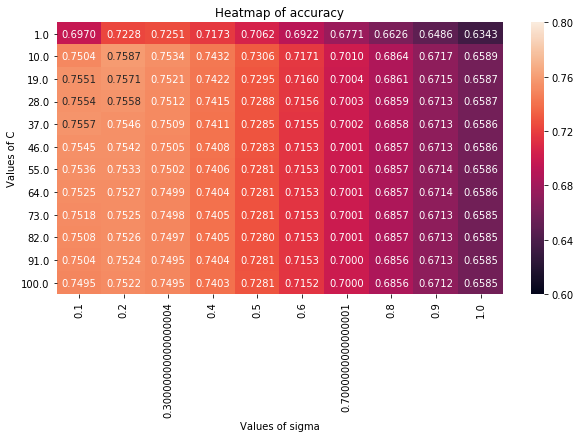

In [14]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores1011.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(10,5))
sns.heatmap(np.average(scores,0).T,
            xticklabels=np.linspace(0.1,1,10), 
            yticklabels=np.linspace(1,100,12), 
            vmin=0.6, vmax=0.8, 
            fmt='.4f', annot=True)
plt.xlabel("Values of sigma")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 10, 10, 30)


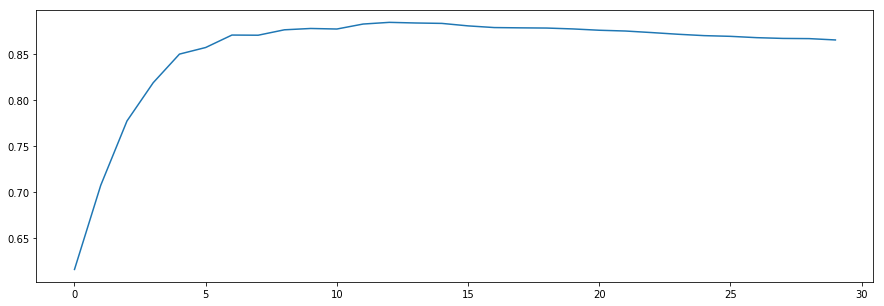

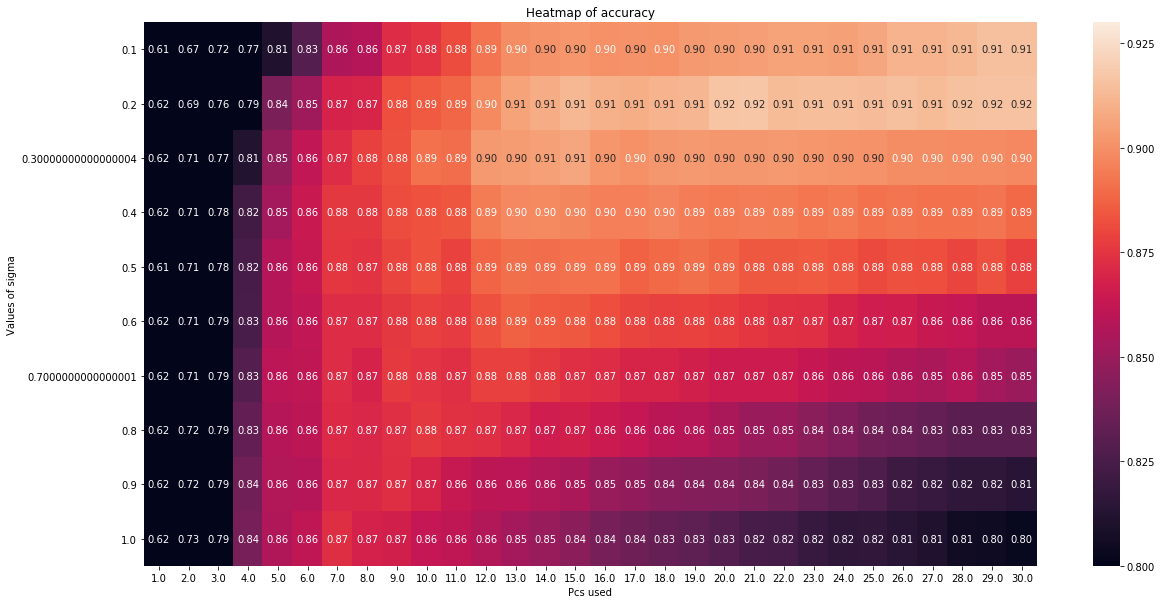

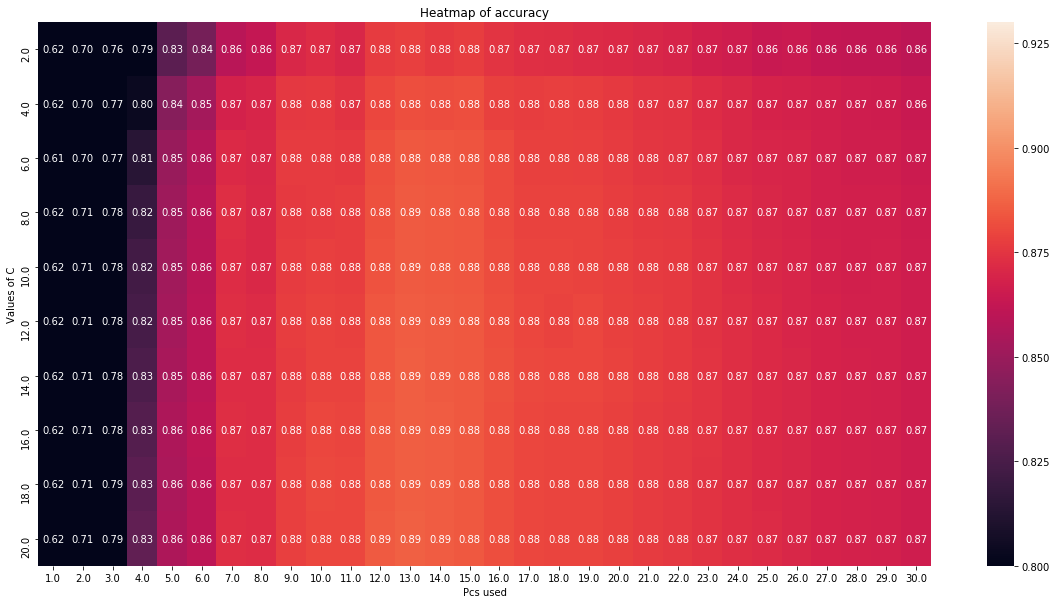

In [15]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scorespcr1.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
#plt.gca().set_xticks(np.insert(np.linspace(1,30,30),0,0))
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(np.average(np.average(scores,0),1),
            xticklabels=np.linspace(1,30,30), 
            yticklabels=np.linspace(0.1,1,10), 
            vmin=0.8, vmax=0.93, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(np.average(np.average(scores,0),0),
            xticklabels=np.linspace(1,30,30), 
            yticklabels=np.linspace(2,20,10), 
            vmin=0.8, vmax=0.93, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 3, 1, 10)


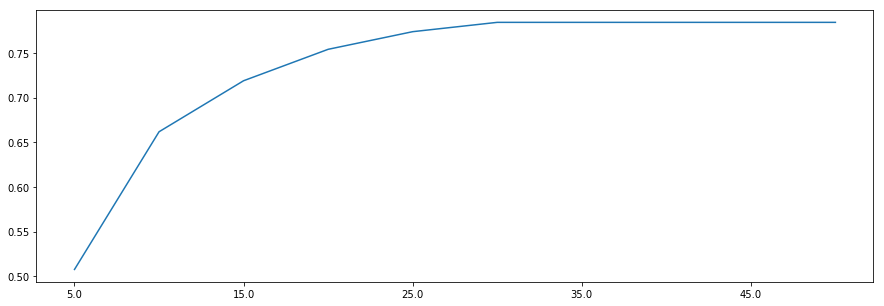

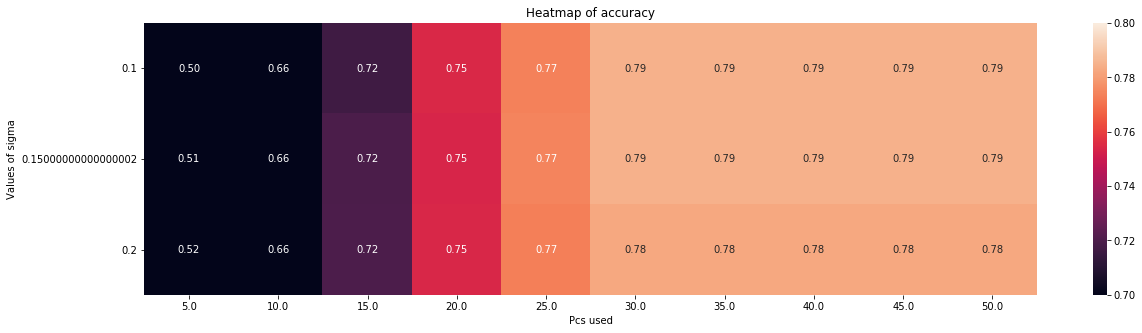

In [16]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scorespc5-50.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
plt.gca().set_xticklabels(np.insert(np.linspace(5,45,5),0,0))
plt.show()

plt.figure(figsize=(20,5))
sns.heatmap(np.average(np.average(scores,0),1),
            xticklabels=np.linspace(5,50,10), 
            yticklabels=np.linspace(0.1,0.2,3), 
            vmin=0.7, vmax=0.8, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()

(10, 3, 1, 11)


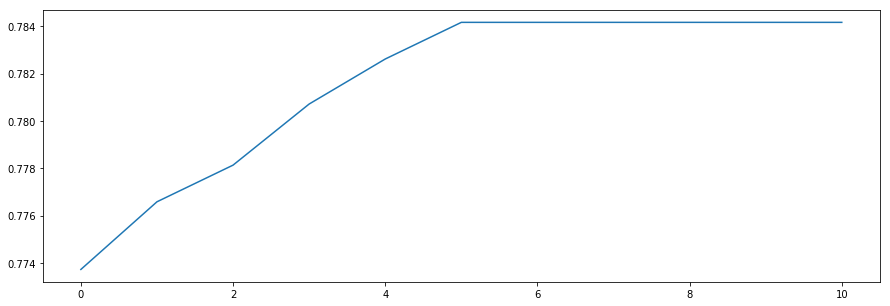

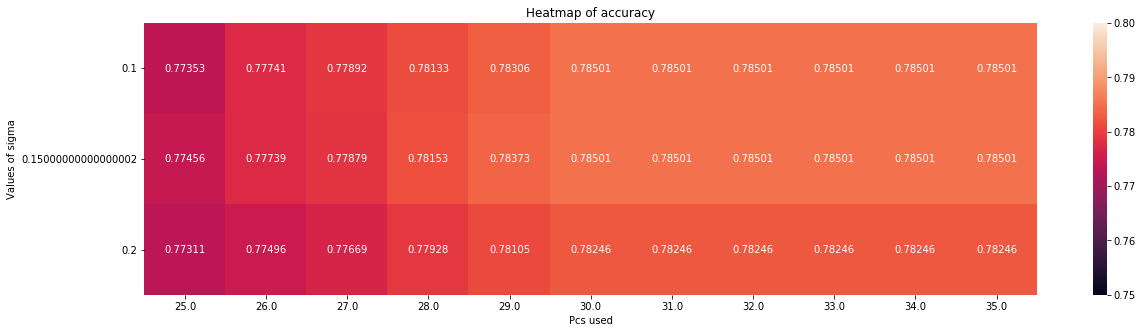

In [21]:
scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scorespc25-35.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
#plt.gca().set_xticklabels(np.insert(np.linspace(5,35,16),0,0))
plt.show()

plt.figure(figsize=(20,5))
sns.heatmap(np.average(np.average(scores,0),1),
            xticklabels=np.linspace(25,35,11), 
            yticklabels=np.linspace(0.1,0.2,3), 
            vmin=0.75, vmax=0.8, 
            fmt='.5f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

(10, 6, 6, 5)


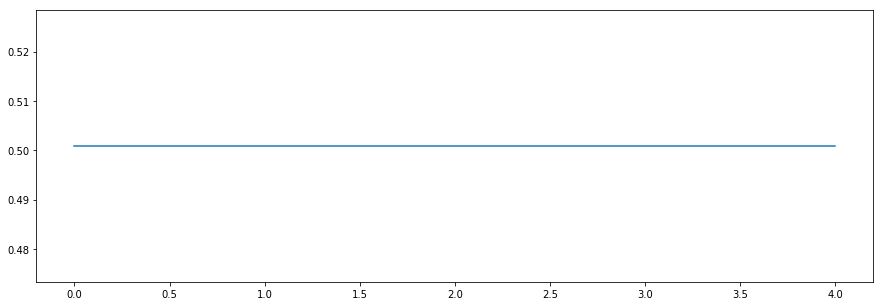

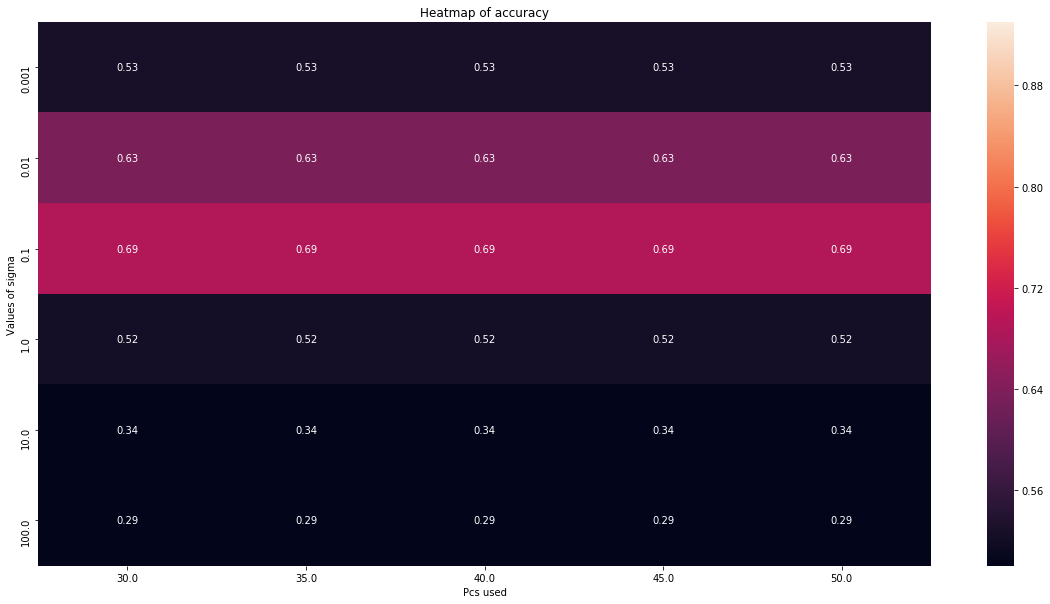

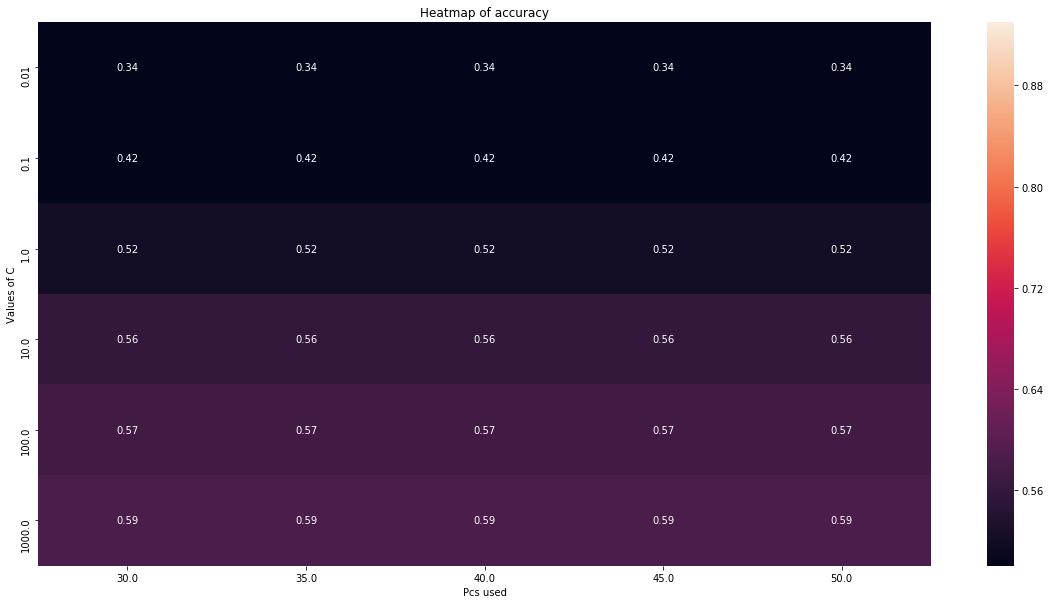

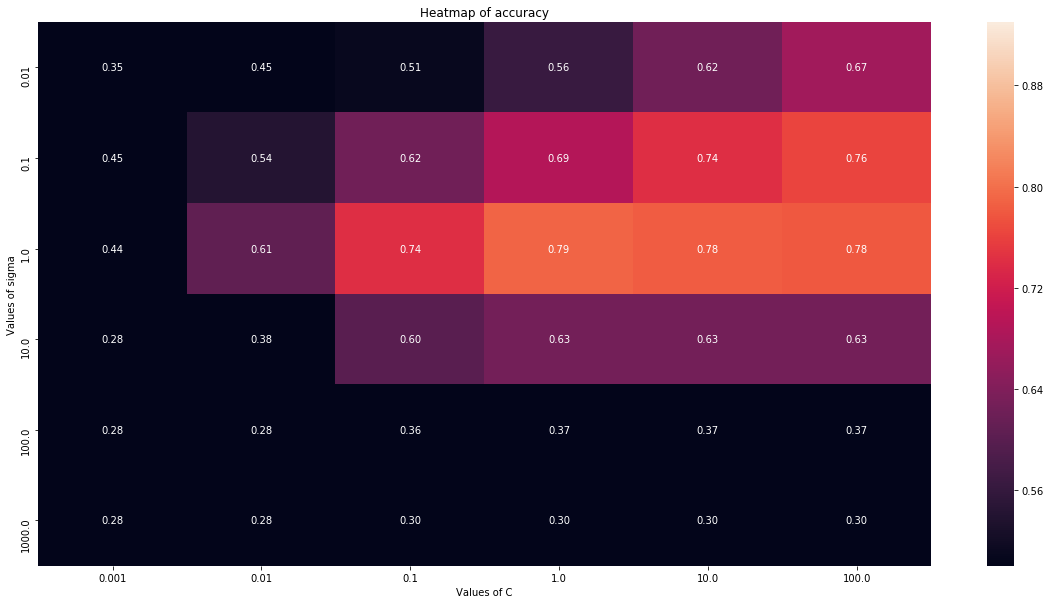

In [3]:
gammas = 6
ls = np.logspace(-3,2,gammas)
#ls = np.linspace(0.1,0.3,gammas)
#ls = np.linspace(0.1,0.1,gammas)

cs = 6
ls2 = np.logspace(-2,3,cs) #High C -> hours of train time.
#ls2 = np.linspace(2,20,cs)
#ls2 = np.linspace(10,10,cs)

pcs = 5
ls3 = np.linspace(30,50,pcs)

scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores2.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
#plt.gca().set_xticks(np.insert(np.linspace(1,30,30),0,0))
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(np.average(np.average(scores,0),1),
            xticklabels=ls3, 
            yticklabels=ls, 
            vmin=0.5, vmax=0.93, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

plt.figure(figsize=(20,10))
sns.heatmap(np.average(np.average(scores,0),0),
            xticklabels=ls3, 
            yticklabels=ls2, 
            vmin=0.5, vmax=0.93, 
            fmt='.2f', annot=True)
plt.xlabel("Pcs used")
plt.ylabel("Values of C")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()


plt.figure(figsize=(20,10))
sns.heatmap(np.average(np.average(scores,0),2),
            xticklabels=ls, 
            yticklabels=ls2, 
            vmin=0.5, vmax=0.93, 
            fmt='.2f', annot=True)
plt.xlabel("Values of C")
plt.ylabel("Values of sigma")
plt.title("Heatmap of accuracy")
plt.show()
plt.show()

In [4]:
gammas = 6
ls = np.logspace(-3,2,gammas)
#ls = np.linspace(0.1,0.3,gammas)
#ls = np.linspace(0.1,0.1,gammas)

cs = 6
ls2 = np.logspace(-2,3,cs) #High C -> hours of train time.
#ls2 = np.linspace(2,20,cs)
#ls2 = np.linspace(10,10,cs)

pcs = 5
ls3 = np.linspace(30,50,pcs)

scores = np.load("/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores.npy")
print(scores.shape)
#print(np.average(scores,0))
plt.figure(figsize=(15,5))
plt.plot(np.average(np.average(np.average(scores,0),0),0))
#plt.gca().set_xticks(np.insert(np.linspace(1,30,30),0,0))
plt.show()

IOError: [Errno 2] No such file or directory: '/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/training/svmscore/scores.npy'